<a href="https://colab.research.google.com/github/kartiksingh0/100days-of-machine-learning/blob/main/Untitled10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn import datasets

In [6]:
data = datasets.load_breast_cancer()

In [7]:
type(data)

sklearn.utils._bunch.Bunch

In [16]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [21]:
df.columns
df['target'].value_counts()

,count
target,
1,357
0,212


In [22]:
from sklearn.model_selection import train_test_split
X = df.drop("target",axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [25]:
from sklearn.preprocessing import  StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)


In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [27]:
y_pred = knn.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9627659574468085

In [37]:
scores= []
for i in range(1,10):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  y_pred = knn.predict(X_test)
  scores.append(accuracy_score(y_test,y_pred))
print(scores)



[0.9468085106382979, 0.9361702127659575, 0.9627659574468085, 0.9680851063829787, 0.9627659574468085, 0.9627659574468085, 0.9680851063829787, 0.9680851063829787, 0.9627659574468085]


<function matplotlib.pyplot.show(close=None, block=None)>

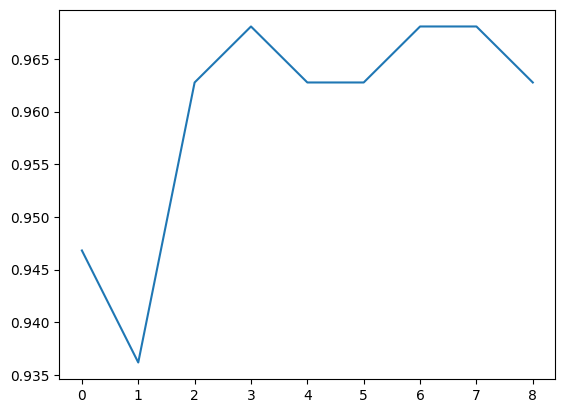

In [38]:
import matplotlib.pyplot as plt
plt.plot(scores)
plt.show